In [1]:
Sys.setenv(LANG="en_US.UTF-8")
Sys.setenv(LC_ALL="en_US.UTF-8")

In [2]:
#Load the necessary libraries:
suppressPackageStartupMessages(library(Seurat))
suppressPackageStartupMessages(library(patchwork))
suppressPackageStartupMessages(library(tibble))
suppressPackageStartupMessages(library(tidyverse))

In [3]:
#Load the Seurat object: 
data <- readRDS(file = "/data/analysis/preeclampsia_2019/analysis/images/updated_seurat_clustering/Placenta_seuratobj_merged_final_2021.rds")

data

An object of class Seurat 
30426 features across 101031 samples within 2 assays 
Active assay: integrated (4311 features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [4]:
#Add number of genes per UMI for each cell to metadata & calculate the log10 value for Genes per UMI: 
data$log10GenesPerUMI <- log10(data$nFeature_RNA) / log10(data$nCount_RNA)

#Create metadata dataframe: 
metadata <- data@meta.data

#Add cell IDs to metadata: 
metadata$cells <- rownames(metadata)

#Rename columns:
#Previous preprocessing: nFeature_RNA > 200. (whole dataset)
metadata <- metadata %>%
        dplyr::rename(nUMI = nCount_RNA,
                      nGene = nFeature_RNA)

#Add metadata back to Seurat object: 
data@meta.data <- metadata

head(data@meta.data)

,orig.ident,nUMI,nGene,stim,percent.mt,S.Score,G2M.Score,Phase,old.ident,integrated_snn_res.0.5,...,cell_type,RNA_snn_res.0.8,Merged_cell_type_PC35,cell_type_merged,sub_cluster,sub_cluster_final,cell_type_semifinal,cell_type_semifinal_v2,log10GenesPerUMI,cells
,<chr>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<fct>,<fct>,<chr>,<chr>,<fct>,<fct>,<dbl>,<chr>
VL_AAACCTGAGATCCCGC-1_1,All,2152,1315,17-025-Villi,0.0464684,0.08267552,-0.057067137,S,All,0,...,SCT,20,3,vSCT_1,vSCT_1,vSCT_1,vSCT_1,vSCT_1,0.9358156,VL_AAACCTGAGATCCCGC-1_1
VL_AAACCTGAGGACAGAA-1_1,All,2241,1590,17-025-Villi,0.7585899,-0.20400513,-0.099962240,G1,All,3,...,VCT_2,7,8,vVCT,vVCT,vVCT,vVCT,vVCT,0.9555149,VL_AAACCTGAGGACAGAA-1_1
VL_AAACCTGAGGCTAGGT-1_1,All,3049,2023,17-025-Villi,0.4591669,0.09302929,-0.017898484,S,All,3,...,VCT_2,7,8,vVCT,vVCT,vVCT,vVCT,vVCT,0.9488652,VL_AAACCTGAGGCTAGGT-1_1
VL_AAACCTGCAAGCGAGT-1_1,All,2641,1781,17-025-Villi,0.1514578,0.21887316,0.009092373,S,All,15,...,MC,16,25,vMC,vMC,vMC,vMC,vMC,0.9499953,VL_AAACCTGCAAGCGAGT-1_1
VL_AAACCTGCAATCACAC-1_1,All,1571,944,17-025-Villi,0.3182686,-0.04044587,-0.024020126,G1,All,6,...,SCT,9,3,vSCT_1,vSCT_1,vSCT_1,vSCT_1,vSCT_1,0.9307910,VL_AAACCTGCAATCACAC-1_1
VL_AAACCTGCACCCTATC-1_1,All,2670,1503,17-025-Villi,0.0000000,-0.04177195,-0.038690526,G1,All,1,...,SCT,9,3,vSCT_1,vSCT_1,vSCT_1,vSCT_1,vSCT_1,0.9271702,VL_AAACCTGCACCCTATC-1_1


In [6]:
#Set idents to sample ID ("stim" in our metadata)
Idents(data) <- 'stim'

levels(data)

[1] "17-025-Villi"   "SEKR2-Villi"    "SOZE1-Villi"    "Term-1"        
 [5] "Term-2"         "Term-3"         "327-Placenta"   "328-Placenta"  
 [9] "372-Placenta"   "389-Placenta"   "419-Placenta"   "557_1-Placenta"
[13] "557_2-Placenta" "17-025-Decidua" "SEKR2-Decidua"  "SOZE1-Decidua" 
[17] "327-Decidua"    "328-Decidua"    "372-Decidua"    "389-Decidua"   
[21] "419-Decidua"    "274-Decidua"

In [ ]:
#Final sample renaming: 'Term-1': 'TRM1-v'; 'Term-2': 'TRM2-v'; 'Term-3': 'TRM3-v'; 'SOZE1' = '17-021'; 'SEKR2' = '17-022' 
#Villi replaced by 'v' & Decidua by 'd'

In [10]:
library(repr)

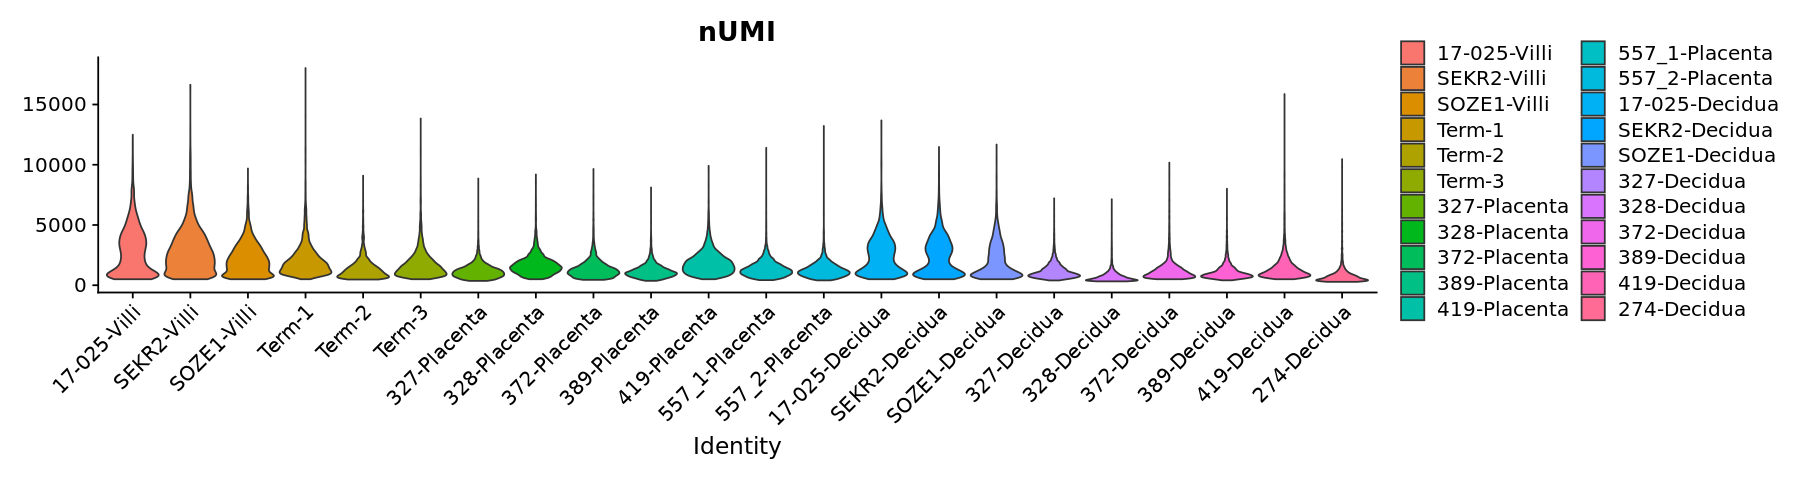

In [12]:
#Plot nUMI across the samples & save it as PDF: Extended figure. 1C
#pdf("nUMI_per_sample.pdf", w=15, h=4, paper= "special")

options(repr.plot.width=15, repr.plot.height=4)

VlnPlot(data, features = "nUMI", pt.size=0, ncol=1)

#dev.off()

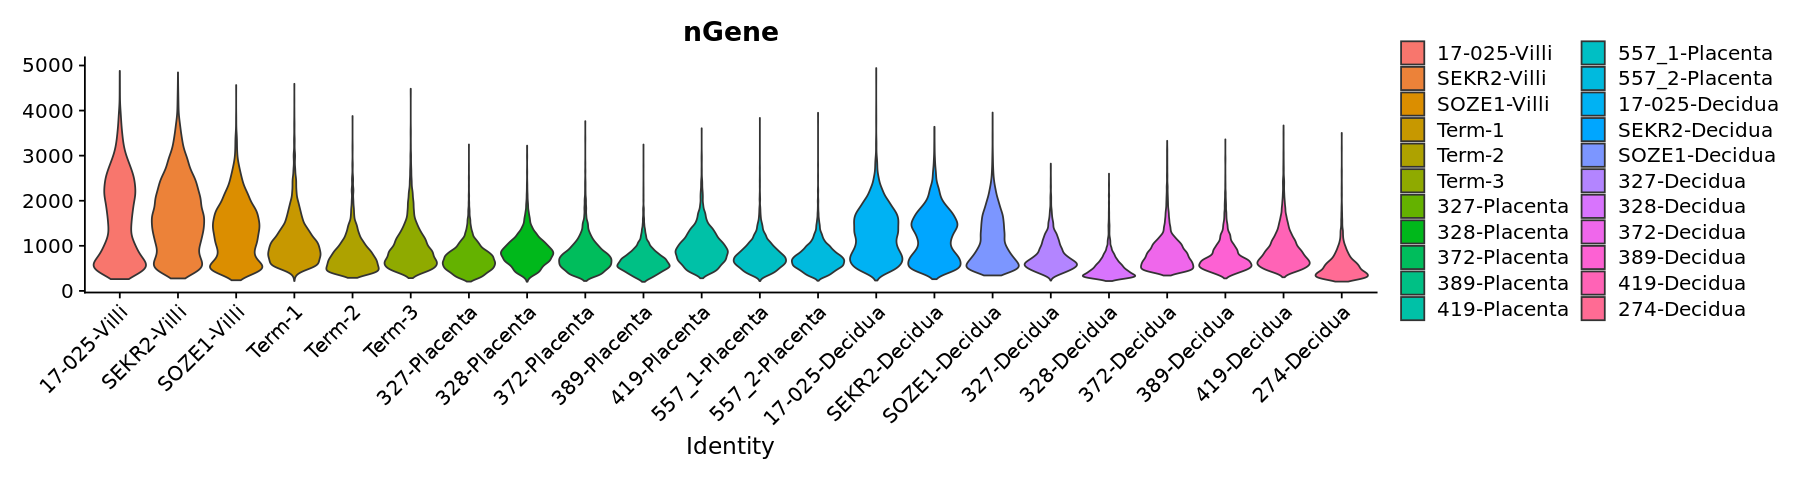

In [13]:
#Plot #genes detected across the samples: Extended figure. 1C

#pdf("nGene_per_sample.pdf", w=15, h=4, paper= "special")

options(repr.plot.width=15, repr.plot.height=4)

VlnPlot(data, features = "nGene", pt.size=0, ncol=1)

#dev.off()

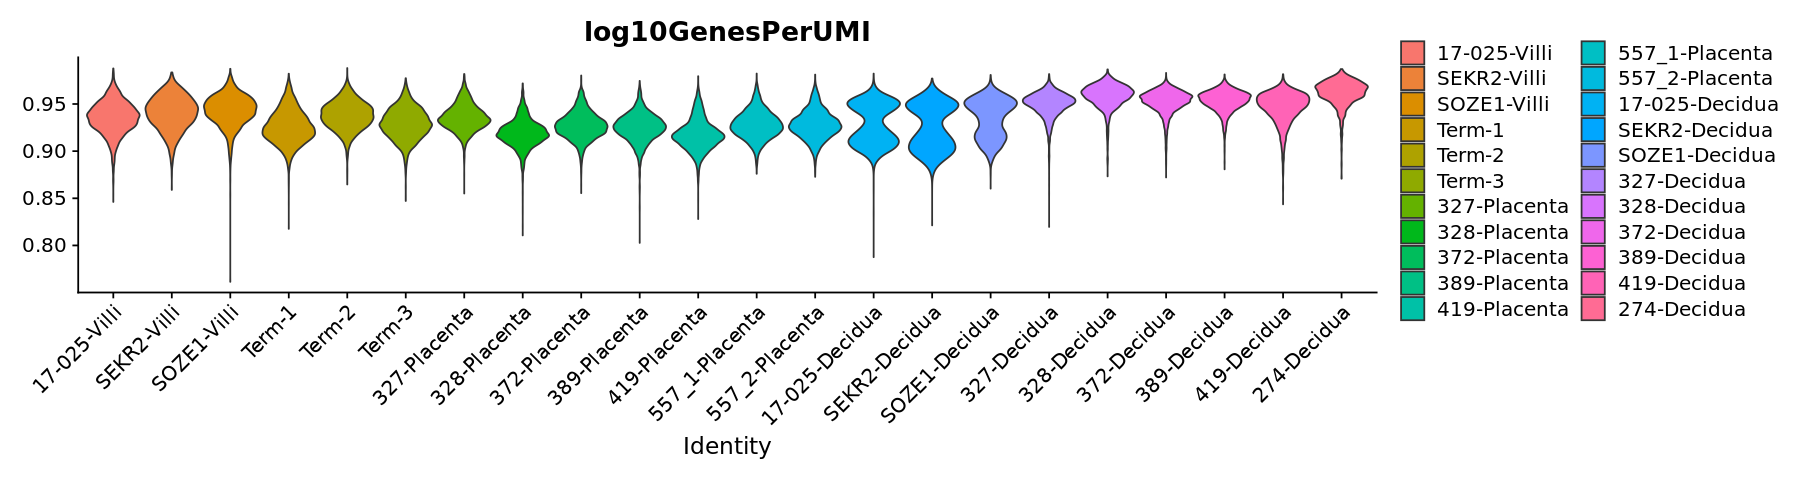

In [14]:
#Complexity > 0.80; Extended figure. 1C

VlnPlot(data, features = "log10GenesPerUMI", pt.size=0, ncol=1)

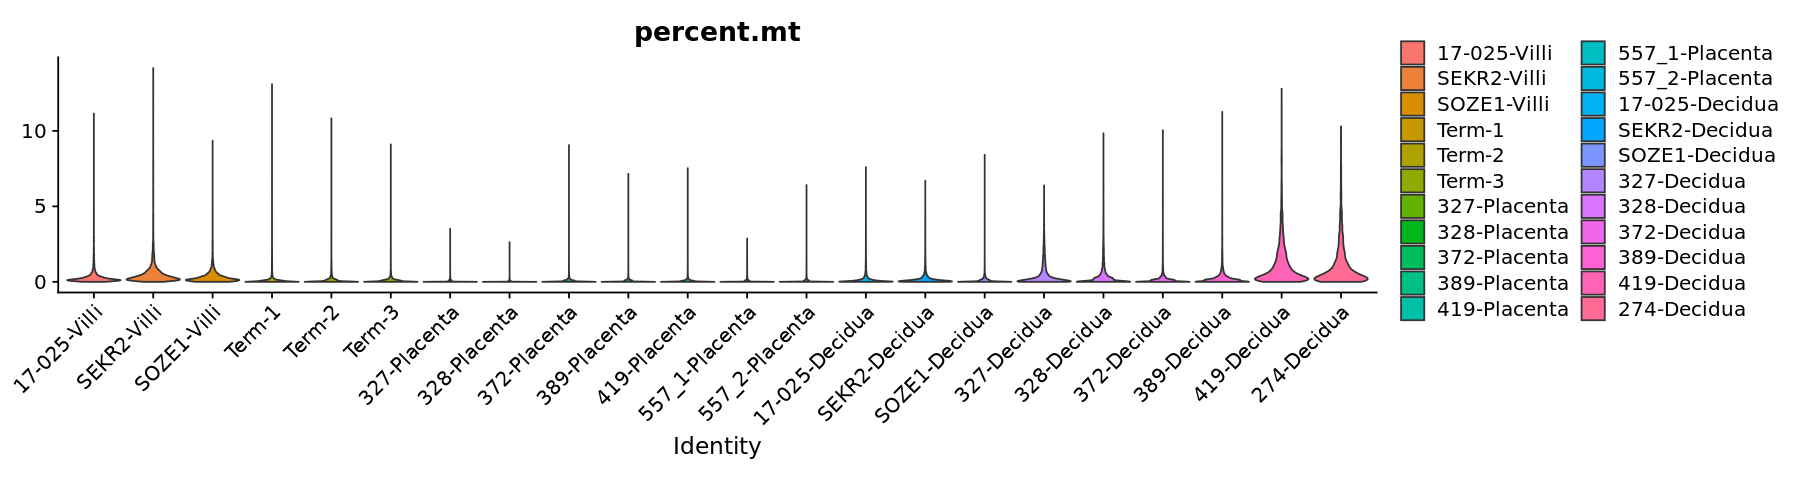

In [15]:
#Extended figure. 1C

VlnPlot(data, features = "percent.mt", pt.size=0, ncol=1)


#Additional analysis per sample: 

Two metrics that are often evaluated together are the number of UMIs and the number
of genes detected per cell. Below, we plotted the #genes versus the
#UMIs colored by the fraction of mitochondrial reads.Mitochondrial read fractions are only high in particularly low count cells with very few detected genes. This could be indicative of damaged/dying cells whose cytoplasmic
mRNA has leaked out through a broken membrane, and thus, only mRNA located in the
mitochondria is still conserved. These cells are filtered out by our count and gene
number thresholds. Jointly visualizing the count and gene thresholds shows the joint
filtering effect.

Cells that are poor quality are likely to have low genes and UMIs per cell, and
correspond to the data points in the bottom left quadrant of the plot. Good quality cells will
generally exhibit both higher number of genes per cell and higher numbers of UMIs. However, this situation can be also variable biologically in situations such as hypoxic/ischemic conditions. 


`geom_smooth()` using formula 'y ~ x'



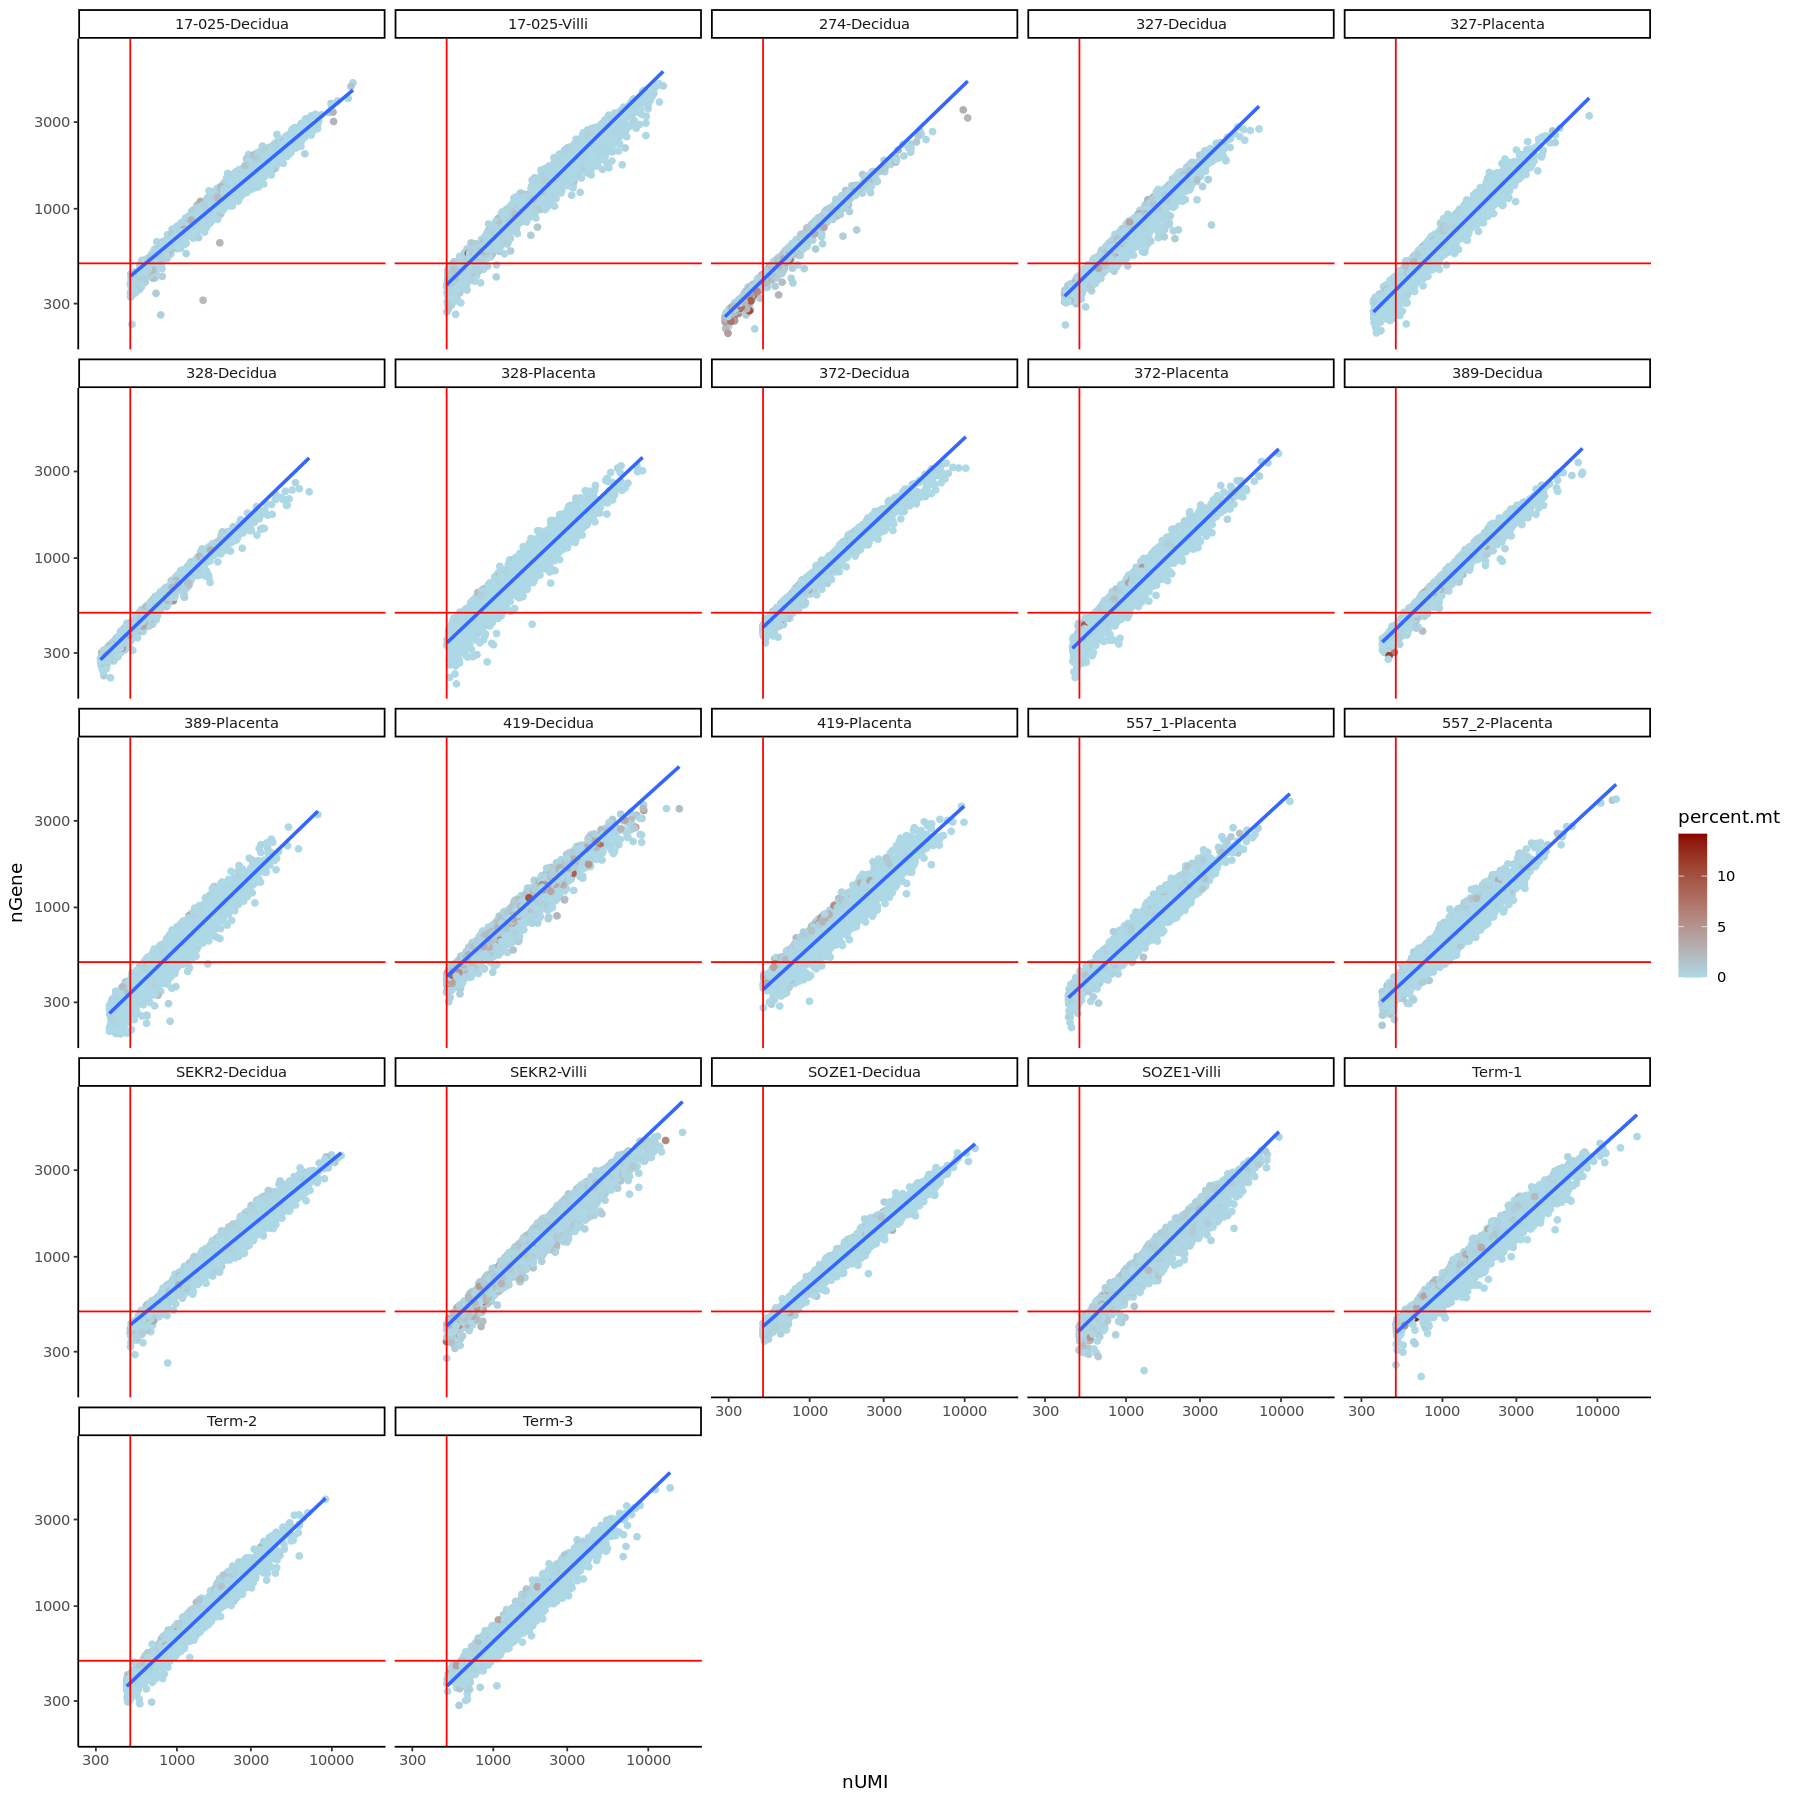

In [18]:
options(repr.plot.width=15, repr.plot.height=15)

#Joint-plots: drawn per sample. 
p <- metadata %>% 
  ggplot(aes(x=nUMI, y=nGene, color=percent.mt)) + 
  geom_point() + scale_colour_gradient(low = "lightblue", high = "darkred") +
  stat_smooth(method=lm) +
  scale_x_log10() + 
  scale_y_log10() + 
  theme_classic() +
  geom_vline(xintercept = 500, colour= "red", linetype = "solid") +
  geom_hline(yintercept = 500, colour= "red", linetype = "solid") +
  facet_wrap(~stim) #'stim' is the metadata column for 'sample ID'

p

#ggsave(plot = p, width = 20, height = 20, dpi = 800, filename = "Sample_wise_JointPlot_2802_v2.pdf") #to save as PDF or SVG. 

`geom_smooth()` using formula 'y ~ x'



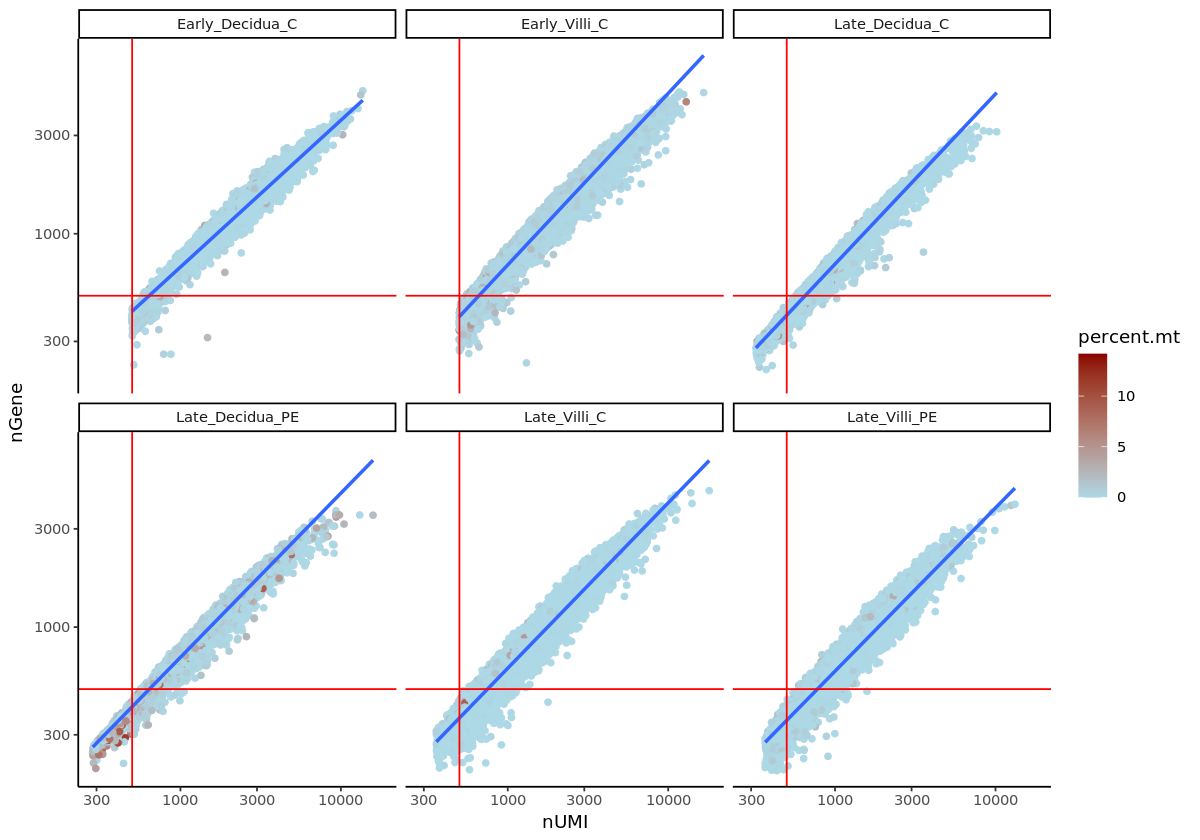

In [21]:
#Inspect the above joint plot between healthy vs PE pregnancies:

options(repr.plot.width=10, repr.plot.height=7)

p <- metadata %>% 
  ggplot(aes(x=nUMI, y=nGene, color=percent.mt)) + 
  geom_point() + scale_colour_gradient(low = "lightblue", high = "darkred") +
  stat_smooth(method=lm) +
  scale_x_log10() + 
  scale_y_log10() + 
  theme_classic() +
  geom_vline(xintercept = 500, colour= "red", linetype = "solid") +
  geom_hline(yintercept = 500, colour= "red", linetype = "solid") +
  facet_wrap(~group) #'group' is the metadata having information on: Early, late controls & Preeclampsia (PE)

p

#ggsave(plot = p, width = 20, height = 10, dpi = 800, filename = "Group_wise_JointPlot_2802_v2.pdf")

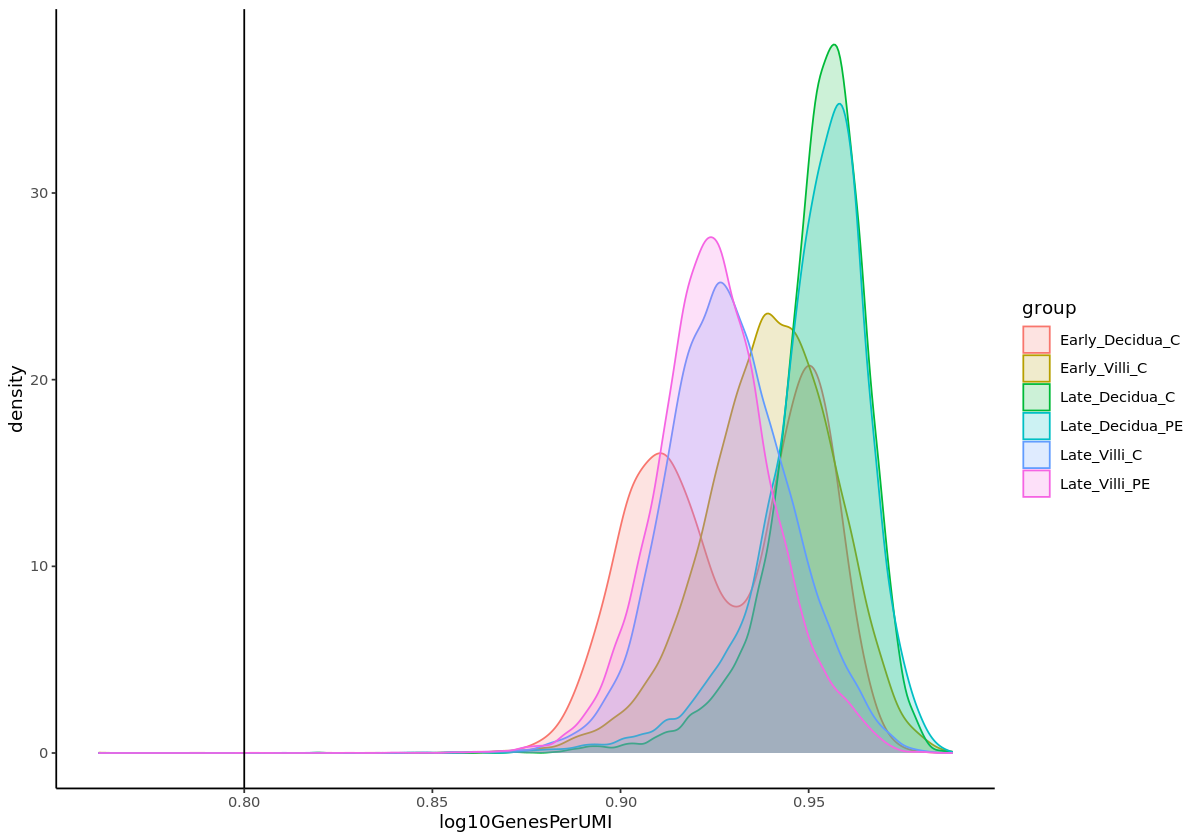

In [22]:
#Additional: Distribution of complexity (log10GenesPerUMI) between tissue groups (healthy vs PE)
p <- metadata %>%
  ggplot(aes(x=log10GenesPerUMI, color = group, fill=group)) +
  geom_density(alpha = 0.2) +
  theme_classic() +
  geom_vline(xintercept = 0.8)

p

In [27]:
colnames(data@meta.data)

[1] "orig.ident"             "nUMI"                   "nGene"                 
 [4] "stim"                   "percent.mt"             "S.Score"               
 [7] "G2M.Score"              "Phase"                  "old.ident"             
[10] "integrated_snn_res.0.5" "seurat_clusters"        "group"                 
[13] "disease"                "time"                   "tissue"                
[16] "tissue_time"            "integrated_snn_res.1"   "integrated_snn_res.2"  
[19] "integrated_snn_res.3"   "cell_type"              "RNA_snn_res.0.8"       
[22] "Merged_cell_type_PC35"  "cell_type_merged"       "sub_cluster"           
[25] "sub_cluster_final"      "cell_type_semifinal"    "cell_type_semifinal_v2"
[28] "log10GenesPerUMI"       "cells"

In [28]:
#Set the "ident" to the final cell-type annotation: 
Idents(data) <- 'cell_type_semifinal_v2'

levels(data)

[1] "dMSC"               "vTSC"               "vVEC"              
 [4] "vDC"                "dVEC"               "vFB"               
 [7] "vEB"                "dLEC"               "dDC"               
[10] "vHBC"               "vtropho_15"         "dEpC"              
[13] "dEVT"               "dFB_1"              "dFB_2"             
[16] "dGranulocyte"       "dLEC_dysfunctional" "dMAC_activated"    
[19] "dMAC_classical"     "dMonocyte"          "dNK_1"             
[22] "dNK_2"              "dNK_prol"           "dPlasmaCell"       
[25] "DSC_1"              "DSC_2"              "dSCT"              
[28] "dSMC"               "dTcell"             "Unclassified_35"   
[31] "vBcell"             "vEVT"               "vMC"               
[34] "vSCT_1"             "vSCT_2"             "vTcell"            
[37] "vVCT"               "vVCT_prol"

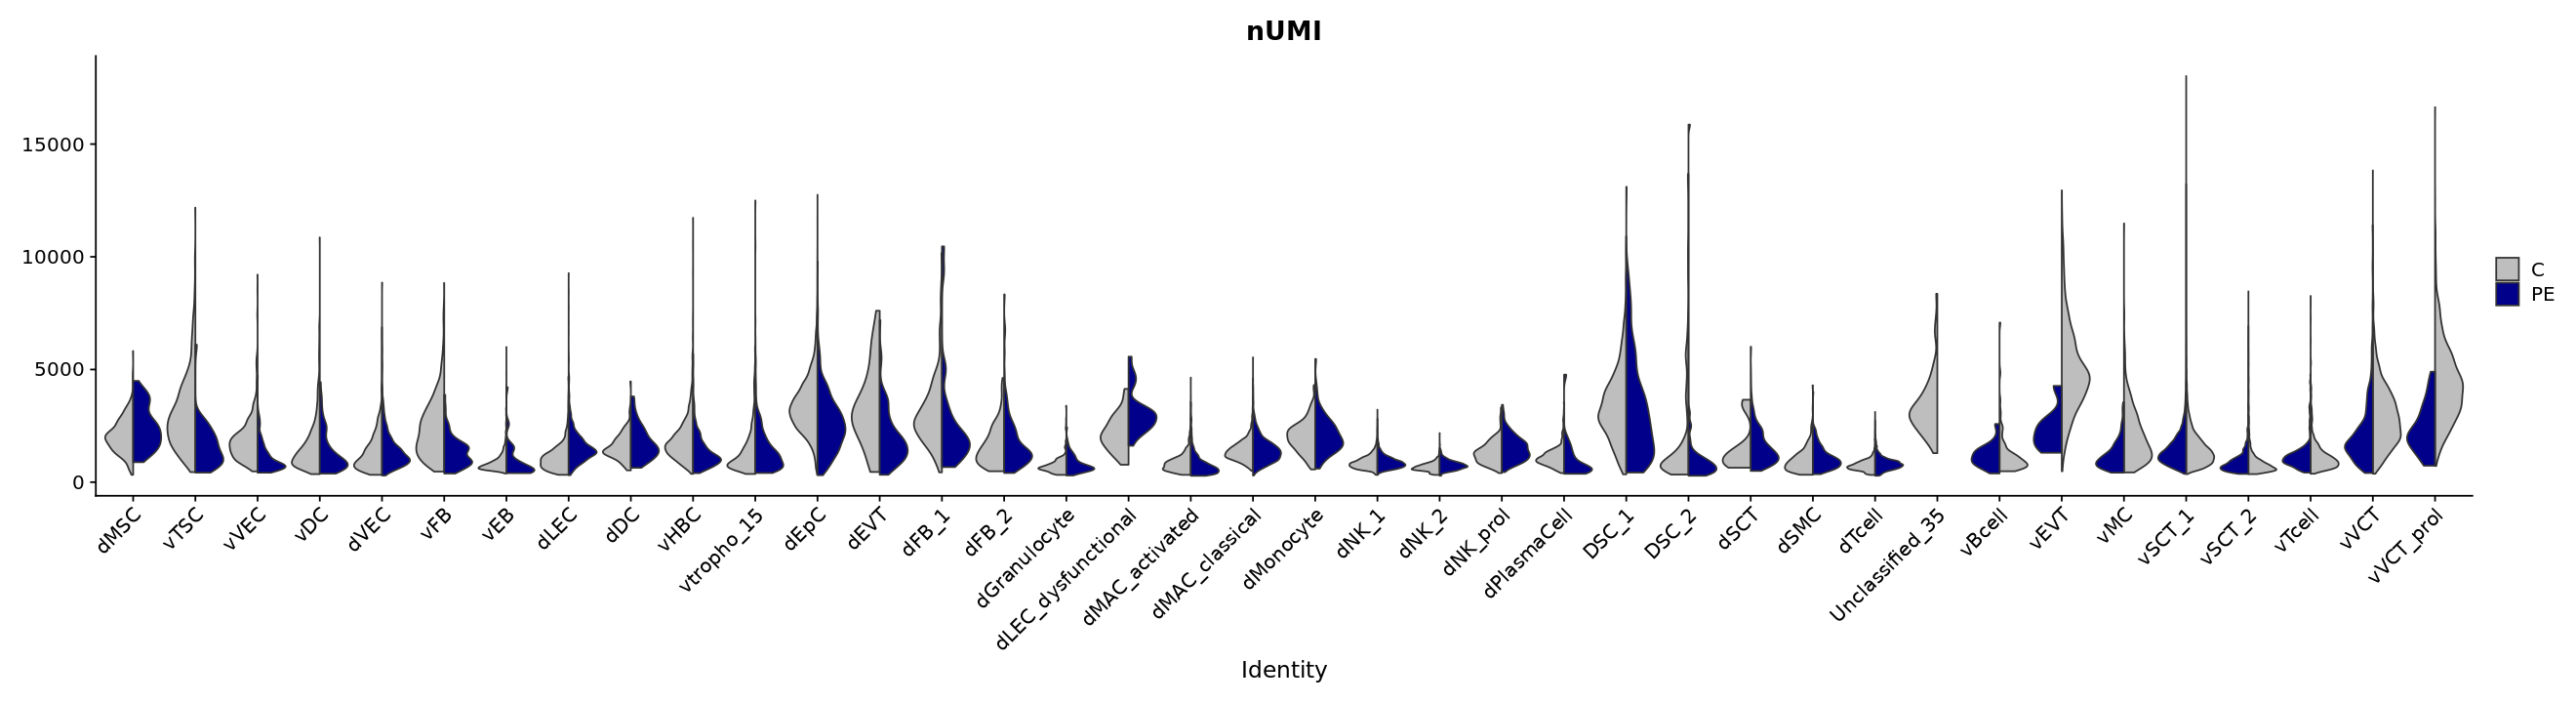

In [29]:
#Investigate nUMI (nCount_RNA) across cell-types: split by normal/healthy vs PE samples (metadata column: 'disease')
#Extended figure.1D. 

options(repr.plot.width=22, repr.plot.height=6)

VlnPlot(data, features = "nUMI", split.by = "disease", pt.size=0, ncol=1, cols = c("grey", "darkblue"))

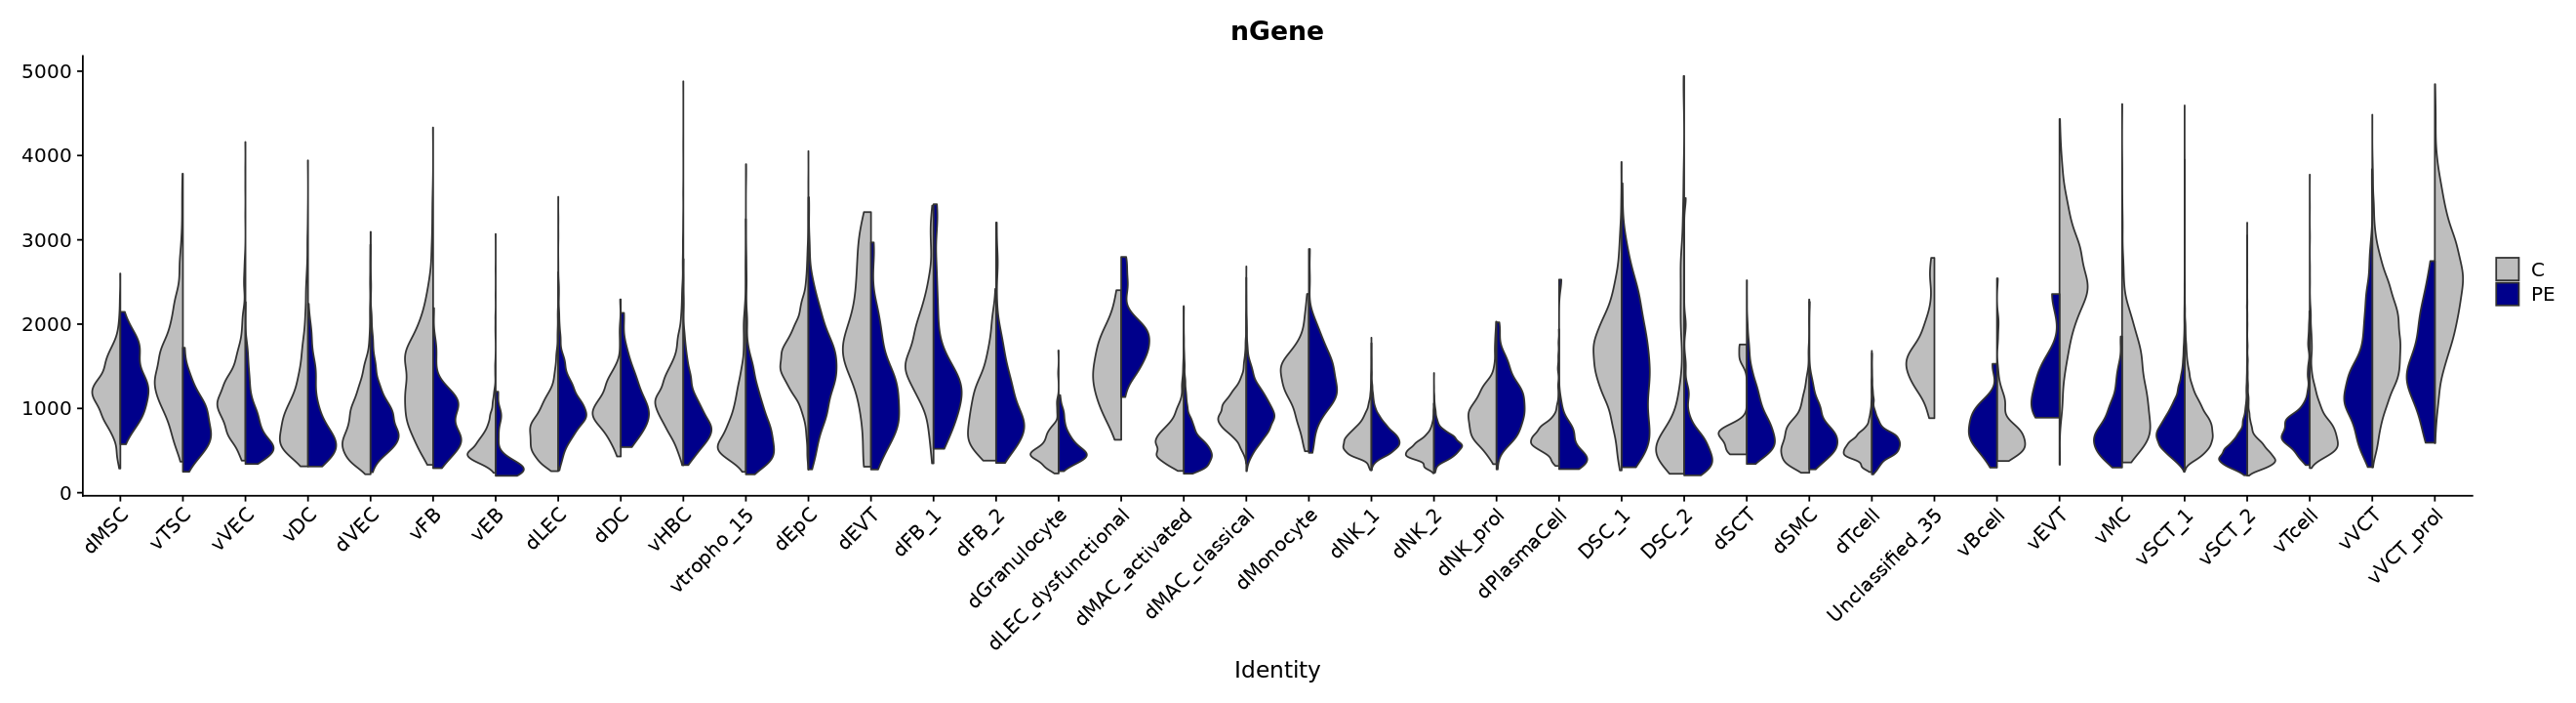

In [30]:
#Investigate nGenes (nFeature_RNA) across cell-types: split by normal/healthy vs PE samples (metadata column: 'disease')
#Extended figure.1D.

options(repr.plot.width=22, repr.plot.height=6)

VlnPlot(data, features = "nGene", split.by = "disease", pt.size=0, ncol=1, cols = c("grey", "darkblue"))

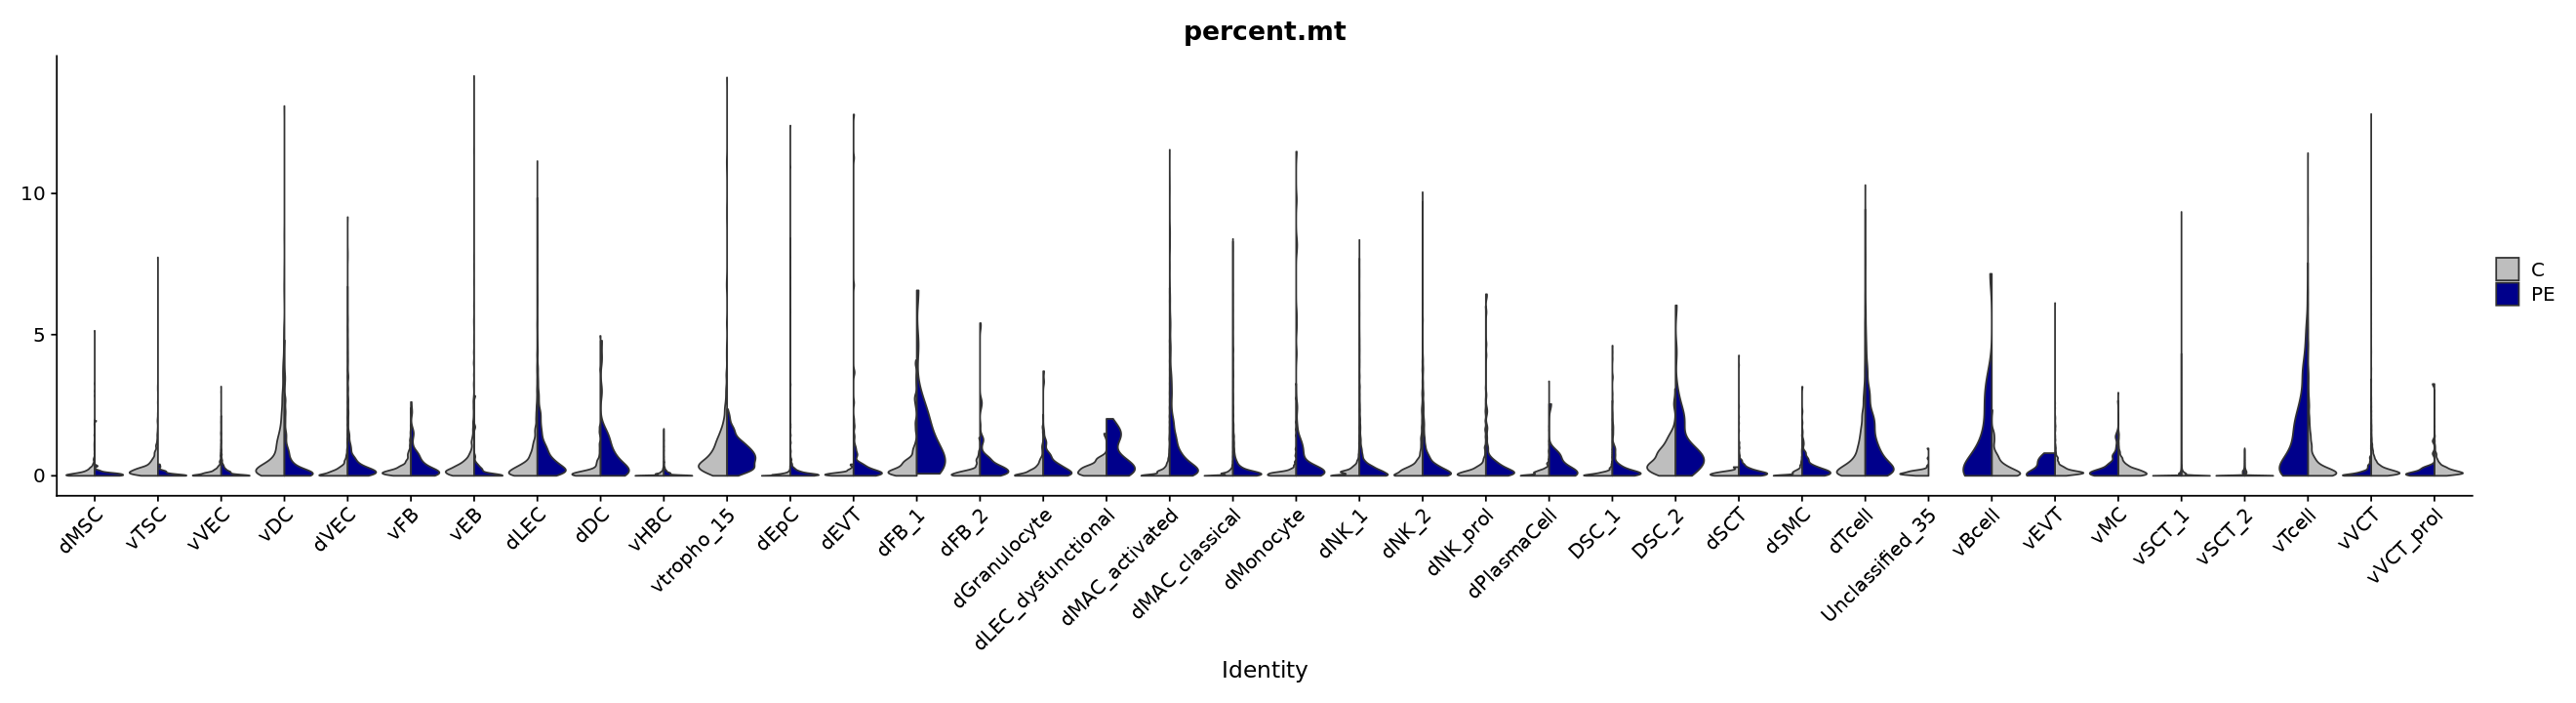

In [31]:
#Additional: plot percentage of mitochondrial transcripts per cell type 
#(due to its variability, we used it as confounder in marker analysis since we've single-nuclei data)
options(repr.plot.width=22, repr.plot.height=6)

VlnPlot(data, features = "percent.mt", split.by = "disease", pt.size=0, ncol=1, cols = c("grey", "darkblue"))

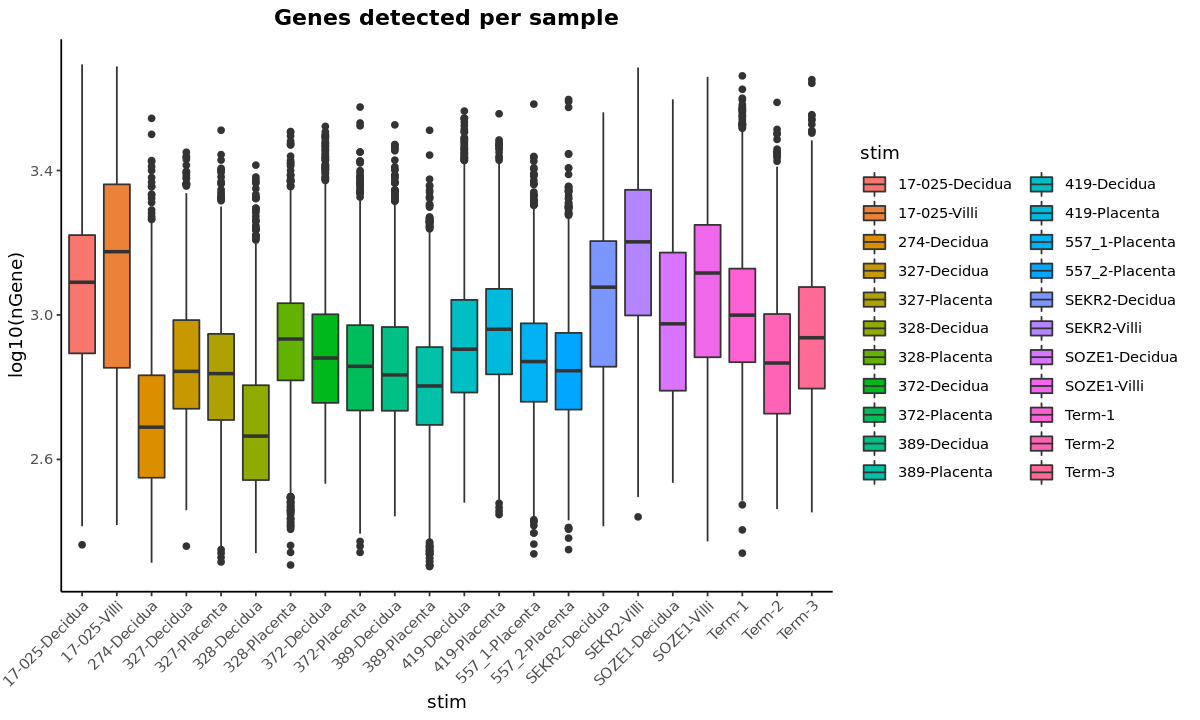

In [34]:
#Additional: Visualize the distribution of genes detected per sample via via boxplot

options(repr.plot.width=10, repr.plot.height=6)

p <- metadata %>% 
  ggplot(aes(x=stim, y=log10(nGene), fill=stim)) + 
  geom_boxplot() + 
  theme_classic() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) +
  theme(plot.title = element_text(hjust=0.5, face="bold")) +
  ggtitle("Genes detected per sample")

p

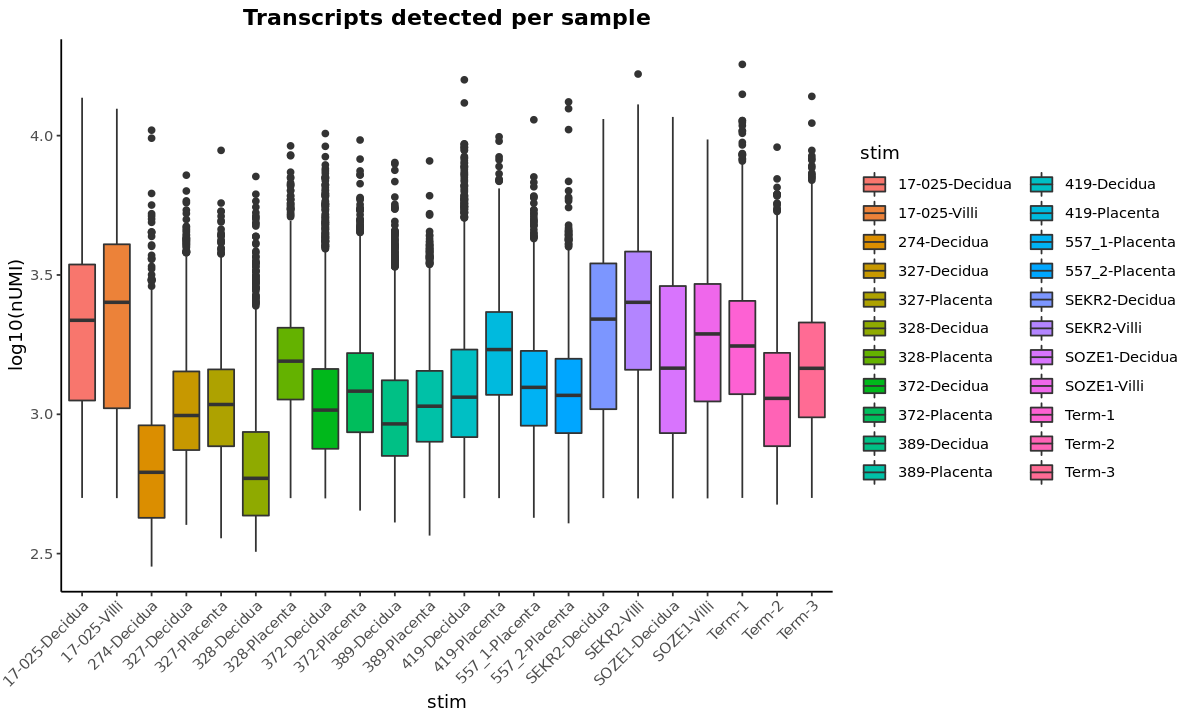

In [35]:
#Additional: Visualize the distribution of nUMI detected per sample via via boxplot

options(repr.plot.width=10, repr.plot.height=6)

p <- metadata %>% 
  ggplot(aes(x=stim, y=log10(nUMI), fill=stim)) + 
  geom_boxplot() + 
  theme_classic() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) +
  theme(plot.title = element_text(hjust=0.5, face="bold")) +
  ggtitle("Transcripts detected per sample")

p

In [36]:
#Cell composition per sample: 

table(Idents(data))


              dMSC               vTSC               vVEC                vDC 
               518                697               1105                720 
              dVEC                vFB                vEB               dLEC 
              1660                811               1167               2797 
               dDC               vHBC         vtropho_15               dEpC 
               177               2246               1158               7065 
              dEVT              dFB_1              dFB_2       dGranulocyte 
               135                214                264                357 
dLEC_dysfunctional     dMAC_activated     dMAC_classical          dMonocyte 
                52               2985               6591                248 
             dNK_1              dNK_2           dNK_prol        dPlasmaCell 
              6631               2761                462                551 
             DSC_1              DSC_2               dSCT               dSMC

In [ ]:
#Python users: import pandas as pd
#cell_comp= pd.crosstab(adata.obs['stim'], adata.obs['cell_type_semifinal_v2'])

In [37]:
#Map the cell types to the latest color codes according to main figure 1B.
cols_new = c("#9AC6C5", "#ff0000", "#FD96A9", "#C0C999", "#F87060", "#DEC1FF", "#e60000", "#bfff80", 
        "31CB00", "#fe6776", "#cc33ff", "#CA6680", "#713E5A", "#BF3100", "#D76A03",
        "#EC9F05", "#8EA604", "#998650", "#E01A4F", "#7A9CC6", "#BDE4A7", "#009900", "#7D8CC4", 
        "#EAC5D8", "#56CBF9", "#7C0B2B", "#FB4B4E", "#0B1D51", "#646881", "#A14A76", "#048BA8", 
        "#5C7AFF", "#63264A", "#ff99cc", "#ff0080", "#A799B7", "#00b3b3", "#004d4d")

In [38]:
metadata <- data@meta.data

metadata$stim <- factor(metadata$stim)  #Converts the gear variable into a factor
metadata$cell_type_semifinal_v2 <- factor(metadata$cell_type_semifinal_v2)  #Converts the cyl variable into a factor

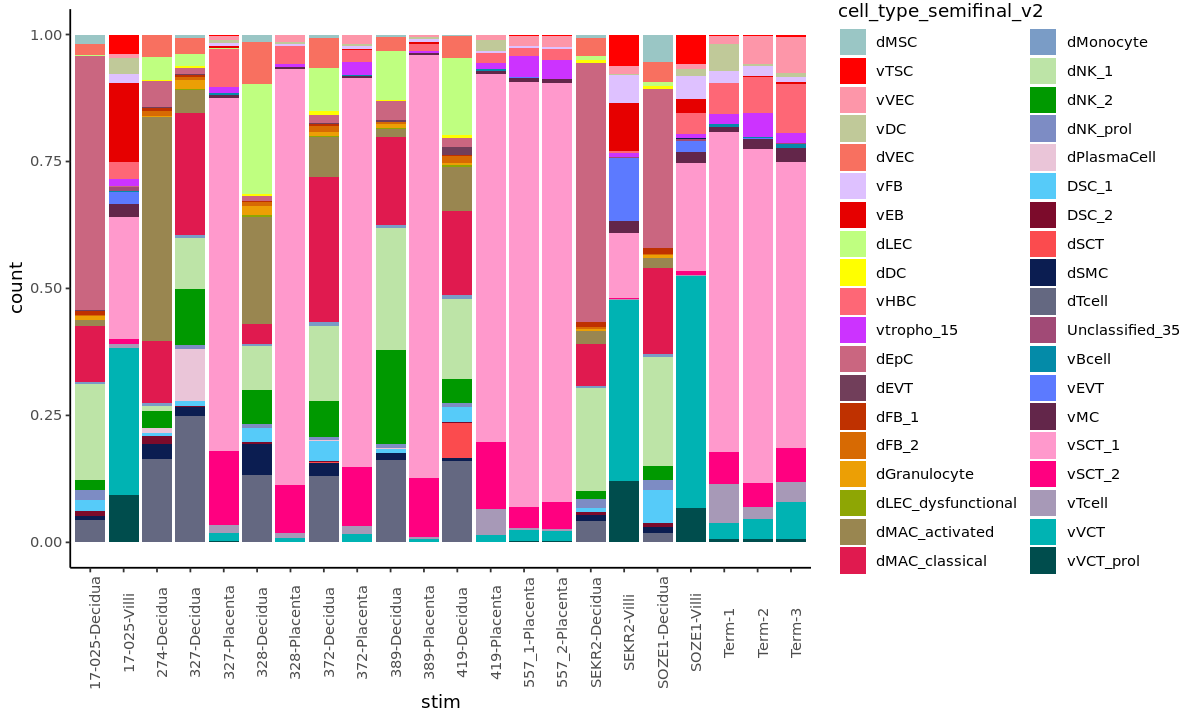

In [40]:
options(repr.plot.width=10, repr.plot.height=6)

p <- ggplot(metadata, aes(x=stim , fill= cell_type_semifinal_v2)) + geom_bar(position= "fill")+scale_fill_manual(values = cols_new) + theme_classic()+ theme(axis.text.x = element_text(angle = 90))

p

In [41]:
#Use conda env: single_cell_env1

sessionInfo()

R version 3.6.1 (2019-07-05)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /home/debnatho/anaconda3/envs/anndata2ri_sc/lib/R/lib/libRblas.so

locale:
[1] en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] repr_1.1.0      forcats_0.5.1   stringr_1.4.0   dplyr_0.8.4    
 [5] purrr_0.3.4     readr_1.3.1     tidyr_1.0.2     ggplot2_3.3.3  
 [9] tidyverse_1.3.0 tibble_2.1.3    patchwork_1.1.1 Seurat_3.1.4   

loaded via a namespace (and not attached):
  [1] readxl_1.3.1        uuid_0.1-4          backports_1.1.5    
  [4] sn_1.5-5            plyr_1.8.5          igraph_1.2.6       
  [7] lazyeval_0.2.2      splines_3.6.1       listenv_0.8.0      
 [10] TH.data_1.0-10      digest_0.6.27       htmltools_0.4.0    
 [13] gdata_2.18.0        fansi_0.4.2         magrittr_2.0.1     
 [16] cluster_2.1.0       ROCR_1.0-7          globa